In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans

In [23]:
df = pd.read_csv("sales_data_sample.csv",encoding='Latin-1')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [25]:
columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'DEALSIZE']

In [26]:
df=df[columns]

In [27]:
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,DEALSIZE
0,30,95.70,2871.00,2,1,2,2003,Small
1,34,81.35,2765.90,5,2,5,2003,Small
2,41,94.74,3884.34,2,3,7,2003,Medium
3,45,83.26,3746.70,6,3,8,2003,Medium
4,49,100.00,5205.27,14,4,10,2003,Medium
...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,15,4,12,2004,Small
2819,29,100.00,3978.51,1,1,1,2005,Medium
2820,43,100.00,5417.57,4,1,3,2005,Medium
2821,34,62.24,2116.16,1,1,3,2005,Small


In [46]:
df.describe()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,DEALSIZE,Cluster
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,6.466171,2.717676,7.092455,2003.81509,1.398512,1.450230
std,9.741443,20.174277,1841.865106,4.225841,1.203878,3.656633,0.69967,0.592498,1.175698
min,6.000000,26.880000,482.130000,1.000000,1.000000,1.000000,2003.00000,0.000000,0.000000
25%,27.000000,68.860000,2203.430000,3.000000,2.000000,4.000000,2003.00000,1.000000,0.000000
50%,35.000000,95.700000,3184.800000,6.000000,3.000000,8.000000,2004.00000,1.000000,1.000000
75%,43.000000,100.000000,4508.000000,9.000000,4.000000,11.000000,2004.00000,2.000000,3.000000
max,97.000000,100.000000,14082.800000,18.000000,4.000000,12.000000,2005.00000,2.000000,3.000000


In [28]:
label_encoder=LabelEncoder()
df['DEALSIZE']=label_encoder.fit_transform((df['DEALSIZE']))

In [29]:
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,DEALSIZE
0,30,95.70,2871.00,2,1,2,2003,2
1,34,81.35,2765.90,5,2,5,2003,2
2,41,94.74,3884.34,2,3,7,2003,1
3,45,83.26,3746.70,6,3,8,2003,1
4,49,100.00,5205.27,14,4,10,2003,1
...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,15,4,12,2004,2
2819,29,100.00,3978.51,1,1,1,2005,1
2820,43,100.00,5417.57,4,1,3,2005,1
2821,34,62.24,2116.16,1,1,3,2005,2


In [30]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [31]:
df_scaled

array([[-0.52289086,  0.5969775 , -0.37082523, ..., -1.39290889,
        -1.16517009,  1.01535268],
       [-0.11220131, -0.11445035, -0.42789707, ..., -0.57233673,
        -1.16517009,  1.01535268],
       [ 0.60650538,  0.54938372,  0.17944282, ..., -0.02528862,
        -1.16517009, -0.672716  ],
       ...,
       [ 0.81185016,  0.81015797,  1.01202368, ..., -1.11938483,
         1.69382614, -0.672716  ],
       [-0.11220131, -1.06186404, -0.78072155, ..., -1.11938483,
         1.69382614,  1.01535268],
       [ 1.2225397 , -0.89925195, -0.25763729, ..., -0.57233673,
         1.69382614, -0.672716  ]])

In [32]:
wcss=[]

In [33]:
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

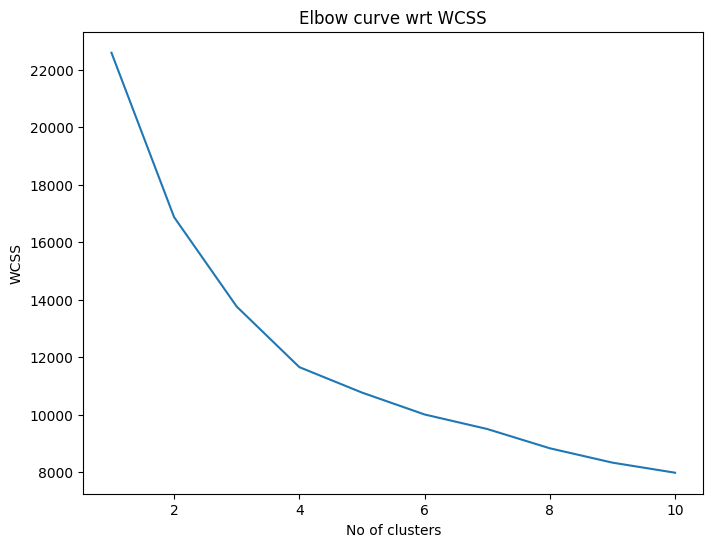

In [34]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow curve wrt WCSS')
plt.show()

In [36]:
clusters=KMeans(n_clusters=4,init='k-means++')
df['Cluster'] = clusters.fit_predict(df_scaled)

C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,DEALSIZE,Cluster
0,30,95.70,2871.00,2,1,2,2003,2,1
1,34,81.35,2765.90,5,2,5,2003,2,1
2,41,94.74,3884.34,2,3,7,2003,1,0
3,45,83.26,3746.70,6,3,8,2003,1,0
4,49,100.00,5205.27,14,4,10,2003,1,0
...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,15,4,12,2004,2,3
2819,29,100.00,3978.51,1,1,1,2005,1,2
2820,43,100.00,5417.57,4,1,3,2005,1,2
2821,34,62.24,2116.16,1,1,3,2005,2,1


In [39]:
clusters.cluster_centers_.shape

(4, 8)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)

In [42]:
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

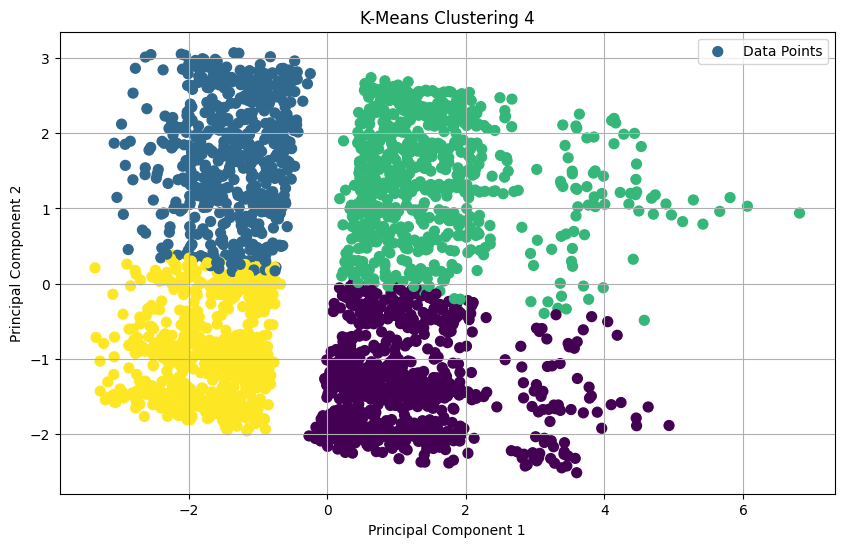

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis', label='Data Points')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title(f'K-Means Clustering 4')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()